Image dimensions: (211, 240, 256)
Image spacing: (1.0, 1.0, 1.0)


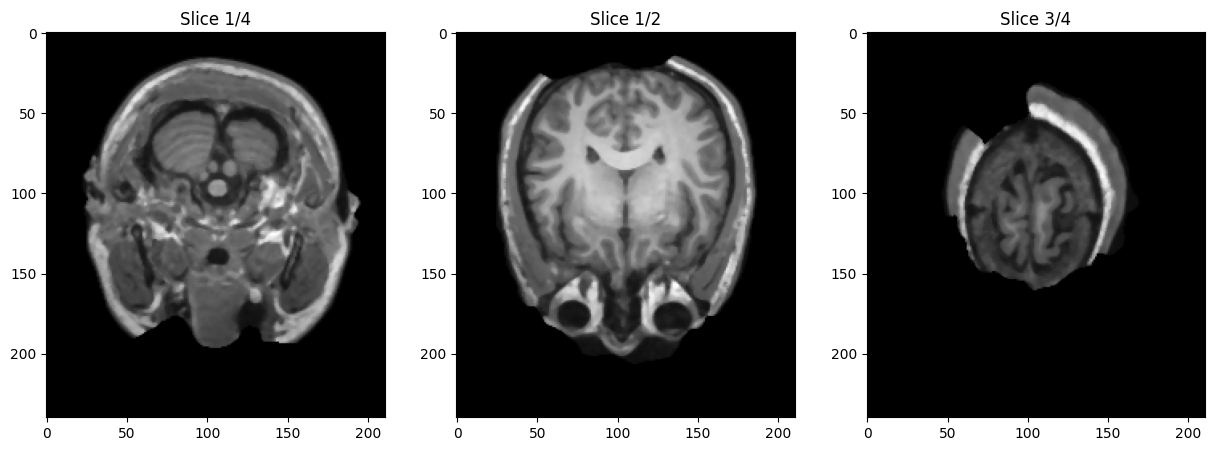

Brain volume: 3129094.00 cubic mm


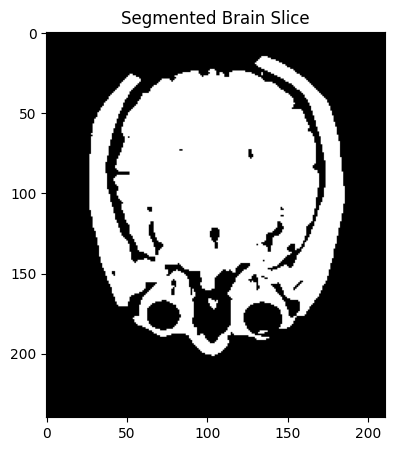

In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Load the NIfTI image
image = sitk.ReadImage('sub-01_ses-2015_T1w.nii')

# Convert to a NumPy array for further processing
image_array = sitk.GetArrayFromImage(image)

# Print image dimensions
print(f"Image dimensions: {image.GetSize()}")
print(f"Image spacing: {image.GetSpacing()}")

# Display multiple image slices (for 3D images)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_array[image_array.shape[0] // 4], cmap='gray')
axes[0].set_title('Slice 1/4')
axes[1].imshow(image_array[image_array.shape[0] // 2], cmap='gray')
axes[1].set_title('Slice 1/2')
axes[2].imshow(image_array[3 * image_array.shape[0] // 4], cmap='gray')
axes[2].set_title('Slice 3/4')
plt.show()

# Preprocess the image (e.g., skull stripping)
# This requires additional tools or predefined masks; assuming we have a binary brain mask
# brain_mask = sitk.ReadImage('brain_mask.nii')
# brain_image = sitk.Mask(image, brain_mask)

# Segment the brain (using Otsu thresholding for simplicity)
# In practice, more advanced methods like FSL FAST or SPM are used
brain_segmented = sitk.OtsuThreshold(image, 0, 1, 200)

# Convert the segmented image to a NumPy array
brain_segmented_array = sitk.GetArrayFromImage(brain_segmented)

# Calculate volumes (number of voxels in each segmented tissue)
brain_volume = np.sum(brain_segmented_array == 1) * np.prod(image.GetSpacing())
print(f"Brain volume: {brain_volume:.2f} cubic mm")

# Visualize the segmentation
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(brain_segmented_array[brain_segmented_array.shape[0] // 2], cmap='gray')
ax.set_title('Segmented Brain Slice')
plt.show()


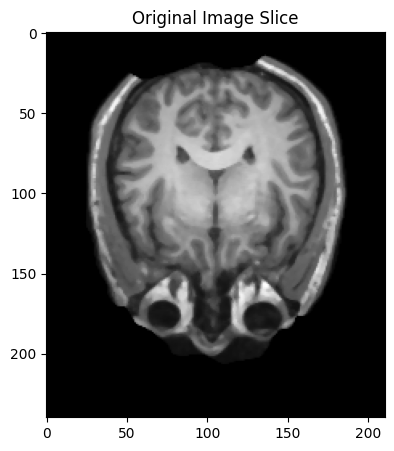

In [2]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Load the NIfTI image
image = sitk.ReadImage('sub-01_ses-2015_T1w.nii')

# Convert to a NumPy array for further processing
image_array = sitk.GetArrayFromImage(image)

# Display a slice of the original image
plt.figure(figsize=(5, 5))
plt.imshow(image_array[image_array.shape[0] // 2], cmap='gray')
plt.title('Original Image Slice')
plt.show()


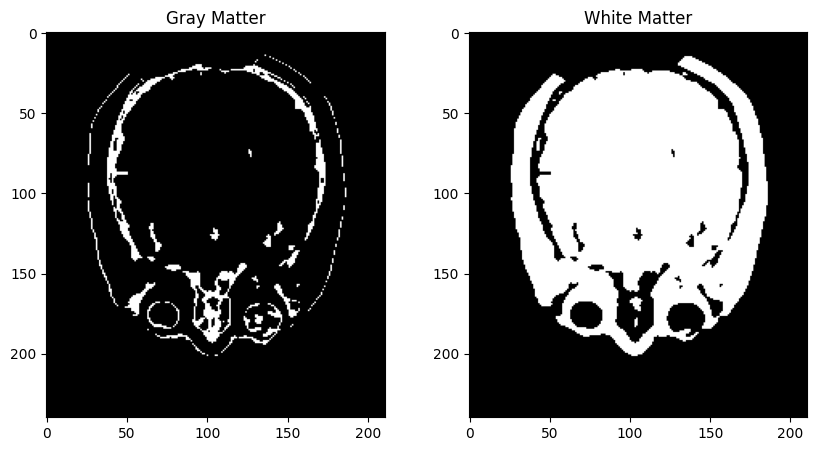

In [3]:
# Apply thresholding to segment gray matter and white matter
# Adjust the threshold values according to your data
gray_matter_threshold = (image_array > 50) & (image_array < 100)
white_matter_threshold = image_array > 100

# Create SimpleITK images from the masks
gray_matter_image = sitk.GetImageFromArray(gray_matter_threshold.astype(np.uint8))
white_matter_image = sitk.GetImageFromArray(white_matter_threshold.astype(np.uint8))
gray_matter_image.CopyInformation(image)
white_matter_image.CopyInformation(image)

# Display the segmented gray matter and white matter
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(gray_matter_threshold[gray_matter_threshold.shape[0] // 2], cmap='gray')
axes[0].set_title('Gray Matter')
axes[1].imshow(white_matter_threshold[white_matter_threshold.shape[0] // 2], cmap='gray')
axes[1].set_title('White Matter')
plt.show()


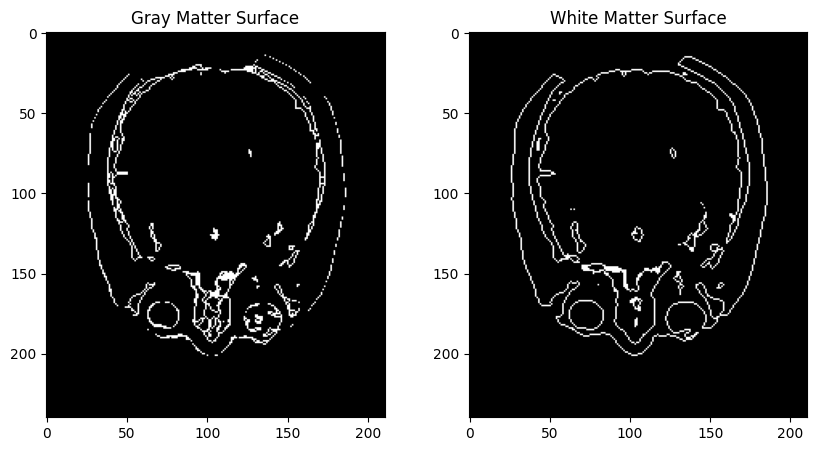

In [4]:
# Extract the surfaces of the gray matter and white matter
gray_matter_surface = sitk.LabelContour(gray_matter_image)
white_matter_surface = sitk.LabelContour(white_matter_image)

# Convert to NumPy arrays
gray_matter_surface_array = sitk.GetArrayFromImage(gray_matter_surface)
white_matter_surface_array = sitk.GetArrayFromImage(white_matter_surface)

# Display the surfaces
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(gray_matter_surface_array[gray_matter_surface_array.shape[0] // 2], cmap='gray')
axes[0].set_title('Gray Matter Surface')
axes[1].imshow(white_matter_surface_array[white_matter_surface_array.shape[0] // 2], cmap='gray')
axes[1].set_title('White Matter Surface')
plt.show()


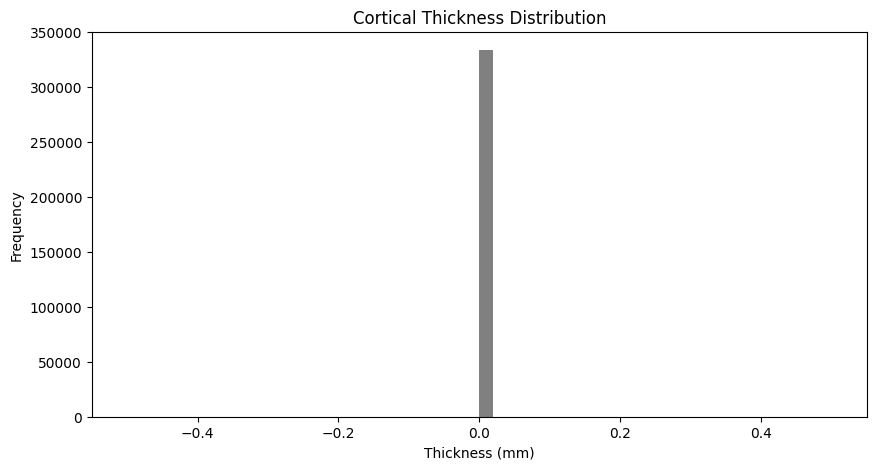

Average Cortical Thickness: 0.00 mm


In [5]:
from scipy.ndimage import distance_transform_edt

# Calculate the distance transform for the white matter surface
distance_transform = distance_transform_edt(white_matter_surface_array)

# Measure cortical thickness by sampling the distance transform at the gray matter surface
cortical_thickness = distance_transform[gray_matter_surface_array > 0]

# Display histogram of cortical thickness
plt.figure(figsize=(10, 5))
plt.hist(cortical_thickness, bins=50, color='gray')
plt.title('Cortical Thickness Distribution')
plt.xlabel('Thickness (mm)')
plt.ylabel('Frequency')
plt.show()

# Calculate average cortical thicknessA
average_thickness = np.mean(cortical_thickness)
print(f"Average Cortical Thickness: {average_thickness:.2f} mm")
